######################################################################

'''    Project No. 1: Mercedes-Benz Greener Manufacturing       '''

######################################################################


In [1]:
# Step1: Import the required libraries
# linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

In [2]:
# Step2: Read the data from train.csv and test.csv
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print("Train shape : ", df_train.shape)
print("Test shape : ", df_test.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


In [3]:
# print few rows and see how the data looks like
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df_train.describe()
df_test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Step3: Collect the Y values into an array

# seperate the y from the data as we will use this to learn as the prediction output
y_train = df_train['y'].values

In [7]:
# Step4: Understand the data types we have

# iterate through all the columns which has X in the name of the column
cols = [c for c in df_train.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

Number of features: 376


In [8]:
print('Feature types:')
df_train[cols].dtypes.value_counts()

Feature types:


int64     368
object      8
dtype: int64

In [9]:
# Step5: Count the data in each of the columns

counts = [[], [], []]
for c in cols:
    typ = df_train[c].dtype
    uniq = len(np.unique(df_train[c]))
    if uniq == 1:
        counts[0].append(c)
    elif uniq == 2 and typ == np.int64:
        counts[1].append(c)
    else:
        counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'
      .format(*[len(c) for c in counts]))
print('Constant features:', counts[0])
print('Categorical features:', counts[2])

Constant features: 12 Binary features: 356 Categorical features: 8

Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [10]:
# for dimensionality reduction
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [11]:
# step 6: remove columns ID and Y from the data as they are not used for learning
usable_columns = list(set(df_train.columns) - set(['ID', 'y']))
y_train = df_train['y'].values
id_test = df_test['ID'].values

In [12]:
x_train = df_train[usable_columns]
x_test = df_test[usable_columns]

In [13]:
# Step7: If for any column(s), the variance is equal to zero,then you need to remove those variable(s).
# Apply label encoder

for column in usable_columns:
    cardinality = len(np.unique(x_train[column]))
    if cardinality == 1:
        x_train.drop(column, axis=1) # Column with only one 
        # value is useless so we drop it
        x_test.drop(column, axis=1)
    if cardinality > 2: # Column is categorical
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
x_train.head()

<ipython-input-13-44679dbec7a6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column] = x_train[column].apply(mapper)
<ipython-input-13-44679dbec7a6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[column] = x_test[column].apply(mapper)


,X287,X234,X3,X175,X244,X90,X36,X253,X217,X338,...,X119,X113,X203,X293,X126,X218,X358,X245,X114,X256
0,0,1,97,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,101,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,99,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,0,0,102,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
4,0,0,102,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1


In [14]:
# Step8: Check for null and unique values for test and train sets

def check_missing_values(df):
    if df.isnull().any().any():
        print("There are missing values in the dataframe")
    else:
        print("There are no missing values in the dataframe")
check_missing_values(x_train)
check_missing_values(x_test)

There are no missing values in the dataframe
There are no missing values in the dataframe


In [15]:
# Step9: Make sure the data is now changed into numericals

print('Feature types:')
x_train[cols].dtypes.value_counts()

Feature types:


int64    376
dtype: int64

In [16]:
# Step10: Perform dimensionality reduction  Linear dimensionality reduction using Singular Value Decomposition of  the data to project it to a lower dimensional space.
n_comp = 12
pca = PCA(n_components=n_comp, random_state=420)
pca.fit_transform(x_train)
pca2_results_train = pca.transform(x_train)
pca.fit_transform(x_test)
pca2_results_test = pca.transform(x_test)

In [17]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

In [18]:
import matplotlib.pyplot as plt

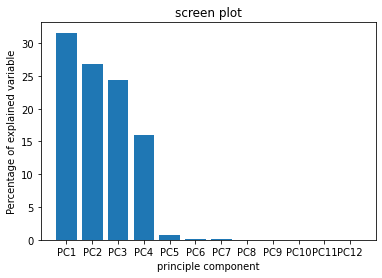

In [19]:
plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variable')
plt.xlabel('principle component')
plt.title('screen plot')
plt.show()

In [20]:
pca_df = pd.DataFrame(data=pca2_results_test,columns=labels)

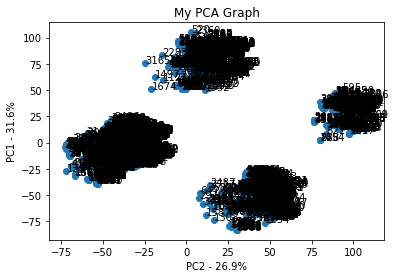

In [21]:
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.ylabel('PC1 - {0}%'.format(per_var[0]))
plt.xlabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

In [22]:
# Step11: Training using xgboost

import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
        pca2_results_train, 
        y_train, test_size=0.2, 
        random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
#d_test = xgb.DMatrix(x_test)
d_test = xgb.DMatrix(pca2_results_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 
                1000, watchlist, early_stopping_rounds=50, 
                feval=xgb_r2_score, maximize=True, verbose_eval=10)

[20:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.14835	valid-rmse:98.26297	train-r2:-58.35295	valid-r2:-67.63754
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.27653	valid-rmse:80.36433	train-r2:-38.88428	valid-r2:-44.91014
[20]	train-rmse:66.71610	valid-rmse:65.77334	train-r2:-25.87403	valid-r2:-29.75260
[30]	train-rmse:54.86915	valid-rmse:53.89120	train-r2:-17.17724	valid-r2:-19.64513
[40]	train-rmse:45.24563	valid-rmse:44.22231	train-r2:-11.36018	valid-r2:-12.90160
[50]	train-rmse:37.44742	valid-rmse:36.37758	train-r2:-7.46672	valid-r2:-8.40697
[60]	train-rmse:31.15105	valid-rmse:30.01771	train-r2:-4.85891	valid-r2:-5.40526
[70]	train-rmse:26.08767	valid-rmse:24.90843	train-r2:-3.10906	valid-r2:-3.41037
[80]	train-rmse:22.04896	

In [23]:
# Step12: Predict your test_df values using xgboost

p_test = clf.predict(d_test)

sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = p_test
sub.to_csv('xgb.csv', index=False)

sub.head()

,ID,y
0,1,83.196556
1,2,104.735275
2,3,83.256393
3,4,76.967995
4,5,97.459457


###################################################################### 
        ''' End '''
######################################################################